# Coursera - W2P1 - Finite Difference Method - First Derivative

## https://yyelgalcvluedodqnnlkhn.coursera-apps.org/notebooks/W2_P1.ipynb#

## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting a sin function

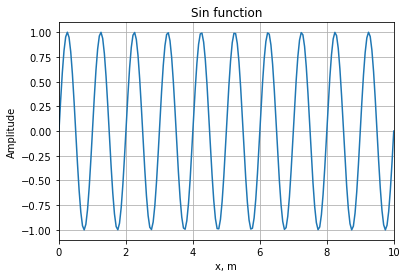

In [2]:
x_max = 10                  # length of domain in m
n_points = 201              # number of points considered
dx = x_max/(float(n_points - 1))   # length of a finite element

lam = 1                     # assuming wavelength as 1 m
k = 2*np.pi/lam             # wavenumber

x = np.linspace(0,x_max, n_points - 1)      # defining the vector x
f_x = np.sin(k*x)

plt.plot(x, f_x)            # plotting the sin function
plt.title('Sin function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, x_max))
plt.grid()
plt.show()                  # show curve


## Analytical and Numerical method comparison for sin function derivative

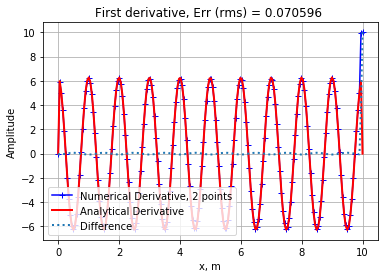

In [3]:
num_der = np.linspace(0,x_max, n_points - 1)        # numerical derivative vector
ana_der = np.linspace(0,x_max, n_points - 1)        # analytical derivative vector

for i in range(1, n_points - 3):
    num_der[i] = (f_x[i+1] - f_x[i-1])/(2*dx)          # Taylor series derivative (numerical)

ana_der = k*np.cos(k*x)                             # Analytical solution
ana_der[0] = 0                                      # Initial point made zero to avoid any issues
# num_der[0] = 0
ana_der[n_points - 2] = 0                           # Final point made zero to avoid any issues
# num_der[n_points - 2] = 0

rms_error = np.sqrt(np.mean(num_der - ana_der)**2)  # Root mean square error

plt.plot (x, num_der,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.plot (x, ana_der, label="Analytical Derivative", lw=2, ls="-",color="red")
plt.plot (x, num_der - ana_der, label="Difference", lw=2, ls=":")
plt.title("First derivative, Err (rms) = %.6f " % rms_error )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()


## Investigating change in error with number of grid points

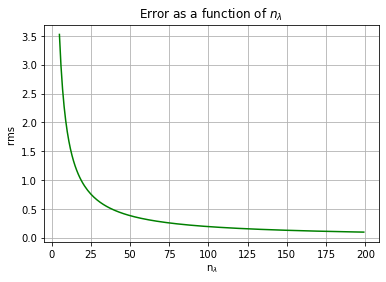

In [4]:
n_points_min = 5                                        # minimum number of points to de considered
n_points_max = 200                                      # maximum number of points to de considered
rms_array = np.zeros(n_points_max  - n_points_min)      # defining array containing error values for every n_point
na = np.zeros(n_points_max  - n_points_min)             # defining array containing the n_points

for j in range(n_points_min, n_points_max):
    na[j-n_points_min] = j
    n_points = j+1  # number of points considered
    dx = x_max / (float(n_points - 1))  # length of a finite element

    lam = na[j-n_points_min]*dx  # assuming wavelength as 1 m   # defining the wavelegth based on number of points taken
    k = 2 * np.pi / lam  # wavenumber

    x = np.linspace(0, x_max, n_points - 1)  # defining the vector x
    f_x = np.sin(k * x)

    # Analytical and Numerical method comparison for sin function derivative
    num_der = np.linspace(0, x_max, n_points - 1)  # numerical derivative vector
    ana_der = np.linspace(0, x_max, n_points - 1)  # analytical derivative vector

    for i in range(1, n_points - 3):
        num_der[i] = (f_x[i + 1] - f_x[i - 1]) / (2 * dx)  # Taylor series derivative (numerical)

    ana_der = k * np.cos(k * x)  # Analytical solution
    ana_der[0] = 0  # Initial point made zero to avoid any issues
    # num_der[0] = 0
    ana_der[n_points - 2] = 0  # Final point made zero to avoid any issues
    # num_der[n_points - 2] = 0

    rms_array[j-n_points_min] = np.sqrt(np.mean(num_der - ana_der) ** 2)  # Root mean square error


plt.plot(na,rms_array, ls='-', color="green")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()